# US Election 2020 Election Forecasting Using Polling Data for Simulations

![](https://i.imgur.com/XxjbFK6.jpg?1)

We'll be using the Latest Polls dataset from [FiveThirtyEight](https://data.fivethirtyeight.com/)

![](https://i.imgur.com/2ROon41.png?1
)
- The file we'll be using is called *presidential_poll.csv*

## Steps

1. Understanding our dataset from [FiveThirtyEight](https://data.fivethirtyeight.com/)
2. Cleaning and Exploring our Data
3. Changing our Data Layout
4. Understanind the US Electoral Process
5. Visualizations
6. Statistical Interpretation and Averaging of Polls
7. Simulating Elections Statistically
8. Result Analysis
9. Visualizng Results on a Map

# 1. Understanding our Dataset

In [ ]:
import pandas as pd
import numpy as np

# I've already downloaded it here but feel free to download and upload a more recent poll
url='https://github.com/rajeevratan84/datascienceforbusiness/blob/master/president_polls.csv?raw=true'
df = pd.read_csv(url)
df

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,created_at,notes,url,stage,race_id,answer,candidate_id,candidate_name,candidate_party,pct
0,133816,71450,2020,Ohio,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,10/20/20 10:30,NaN,https://www.rasmussenreports.com/public_conten...,general,6246,Biden,13256,Joseph R. Biden Jr.,DEM,48.0
1,133816,71450,2020,Ohio,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,10/20/20 10:30,NaN,https://www.rasmussenreports.com/public_conten...,general,6246,Trump,13254,Donald Trump,REP,47.0
2,133838,71457,2020,Pennsylvania,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,10/20/20 13:21,NaN,https://www.rasmussenreports.com/public_conten...,general,6249,Biden,13256,Joseph R. Biden Jr.,DEM,50.0
3,133838,71457,2020,Pennsylvania,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,10/20/20 13:21,NaN,https://www.rasmussenreports.com/public_conten...,general,6249,Trump,13254,Donald Trump,REP,47.0
4,133777,71435,2020,Georgia,1102,Emerson College,1446,NewsNation,Emerson College,88.0,...,10/19/20 20:06,NaN,https://emersonpolling.reportablenews.com/pr/g...,general,6221,Biden,13256,Joseph R. Biden Jr.,DEM,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11904,92081,57026,2020,Ohio,383,Public Policy Polling,1363,DEM (partisan),Public Policy Polling,263.0,...,12/6/18 14:45,NaN,https://www.cleveland.com/politics/2018/11/thi...,general,6246,Trump,13254,Donald Trump,REP,46.0
11905,92082,57026,2020,Ohio,383,Public Policy Polling,1363,DEM (partisan),Public Policy Polling,263.0,...,12/6/18 14:46,NaN,https://www.cleveland.com/politics/2018/11/thi...,general,6246,Warren,13258,Elizabeth Warren,DEM,43.0
11906,92082,57026,2020,Ohio,383,Public Policy Polling,1363,DEM (partisan),Public Policy Polling,263.0,...,12/6/18 14:46,NaN,https://www.cleveland.com/politics/2018/11/thi...,general,6246,Trump,13254,Donald Trump,REP,49.0
11907,92078,57025,2020,NaN,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,12/6/18 14:40,NaN,http://www.rasmussenreports.com/public_content...,general,6210,Obama,13253,Michelle Obama,DEM,50.0


#### Let's just see what columns we're working with

In [ ]:
df.columns

Index(['question_id', 'poll_id', 'cycle', 'state', 'pollster_id', 'pollster',
       'sponsor_ids', 'sponsors', 'display_name', 'pollster_rating_id',
       'pollster_rating_name', 'fte_grade', 'sample_size', 'population',
       'population_full', 'methodology', 'office_type', 'seat_number',
       'seat_name', 'start_date', 'end_date', 'election_date',
       'sponsor_candidate', 'internal', 'partisan', 'tracking',
       'nationwide_batch', 'ranked_choice_reallocated', 'created_at', 'notes',
       'url', 'stage', 'race_id', 'answer', 'candidate_id', 'candidate_name',
       'candidate_party', 'pct'],
      dtype='object')

There's a lot of good useful information in this dataset. Perhaps too much! We won't be using all for our simulations though.

Alot of these have potential for Statistical Analysis, I'll leave some in for you but we're only going to use the **pct** results

In [ ]:
# Let's keep only the information we'll be using, namely the poll's final results
df = df[['question_id','poll_id','state', 'pollster','start_date','end_date','answer','pct']]
df

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,10/18/20,10/19/20,Biden,48.0
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,10/18/20,10/19/20,Trump,47.0
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,10/18/20,10/19/20,Biden,50.0
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,10/18/20,10/19/20,Trump,47.0
4,133777,71435,Georgia,Emerson College,10/17/20,10/19/20,Biden,47.0
...,...,...,...,...,...,...,...,...
11904,92081,57026,Ohio,Public Policy Polling,11/27/18,11/28/18,Trump,46.0
11905,92082,57026,Ohio,Public Policy Polling,11/27/18,11/28/18,Warren,43.0
11906,92082,57026,Ohio,Public Policy Polling,11/27/18,11/28/18,Trump,49.0
11907,92078,57025,NaN,Rasmussen Reports/Pulse Opinion Research,11/12/18,11/13/18,Obama,50.0


In [ ]:
# How many Pollsters are we working with?
print(len(df.pollster.unique()))

196


In [ ]:
df.start_date.unique()

array(['10/18/20', '10/17/20', '10/15/20', '10/13/20', '10/6/20',
       '10/16/20', '10/14/20', '10/5/20', '9/21/20', '9/20/20',
       '10/12/20', '10/4/20', '9/19/20', '10/3/20', '9/18/20', '10/11/20',
       '10/9/20', '10/2/20', '9/17/20', '10/10/20', '10/7/20', '10/1/20',
       '9/16/20', '10/8/20', '9/30/20', '9/15/20', '9/29/20', '9/14/20',
       '9/28/20', '9/27/20', '9/26/20', '9/25/20', '9/22/20', '9/24/20',
       '9/23/20', '9/1/20', '9/13/20', '9/12/20', '9/10/20', '9/11/20',
       '9/9/20', '9/8/20', '9/7/20', '9/6/20', '9/5/20', '9/4/20',
       '9/3/20', '9/2/20', '8/31/20', '8/29/20', '8/30/20', '8/28/20',
       '8/27/20', '8/26/20', '8/25/20', '8/24/20', '8/23/20', '8/22/20',
       '8/21/20', '8/20/20', '8/19/20', '8/18/20', '8/1/20', '8/17/20',
       '8/16/20', '8/15/20', '8/14/20', '8/13/20', '8/12/20', '8/11/20',
       '8/9/20', '8/10/20', '8/8/20', '8/7/20', '8/6/20', '8/5/20',
       '8/4/20', '8/3/20', '8/2/20', '7/31/20', '7/30/20', '7/28/20',
       '7

In [ ]:
# Let's see if our data types are alright
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11909 entries, 0 to 11908
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   question_id  11909 non-null  int64  
 1   poll_id      11909 non-null  int64  
 2   state        7363 non-null   object 
 3   pollster     11909 non-null  object 
 4   start_date   11909 non-null  object 
 5   end_date     11909 non-null  object 
 6   answer       11909 non-null  object 
 7   pct          11909 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 744.4+ KB


In [ ]:
# Nope they weren't for the date columns so let's fix that
df['start_date'] = pd.to_datetime(df['end_date'])
df['end_date'] = pd.to_datetime(df['end_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11909 entries, 0 to 11908
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   question_id  11909 non-null  int64         
 1   poll_id      11909 non-null  int64         
 2   state        7363 non-null   object        
 3   pollster     11909 non-null  object        
 4   start_date   11909 non-null  datetime64[ns]
 5   end_date     11909 non-null  datetime64[ns]
 6   answer       11909 non-null  object        
 7   pct          11909 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 744.4+ KB


<ipython-input-7-257aa6aaf129>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_date'] = pd.to_datetime(df['end_date'])
<ipython-input-7-257aa6aaf129>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['end_date'] = pd.to_datetime(df['end_date'])


In [ ]:
# Sanity check to make sure we didn't mess up anything
df.head(10)

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,48.0
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,50.0
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0
4,133777,71435,Georgia,Emerson College,2020-10-19,2020-10-19,Biden,47.0
5,133777,71435,Georgia,Emerson College,2020-10-19,2020-10-19,Trump,48.4
6,133810,71446,NaN,IBD/TIPP,2020-10-19,2020-10-19,Biden,48.1
7,133810,71446,NaN,IBD/TIPP,2020-10-19,2020-10-19,Trump,45.8
8,133810,71446,NaN,IBD/TIPP,2020-10-19,2020-10-19,Jorgensen,3.0
9,133810,71446,NaN,IBD/TIPP,2020-10-19,2020-10-19,Hawkins,0.9


# Cleaning and Exploring our data
### Filter out older Polls
Let's get all polls that start or end between Aug 1st and Nov 2nd 2020. This gives us the 3 months leading up to the Nov 2nd Election Date.

In [ ]:
start_date = '2020-08-01'
end_date = '2020-11-02'

mask = (df['start_date'] >= start_date) & (df['end_date'] <= end_date)
mask

0         True
1         True
2         True
3         True
4         True
         ...  
11904    False
11905    False
11906    False
11907    False
11908    False
Length: 11909, dtype: bool

In [ ]:
df = df.loc[mask]
df

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,48.0
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,50.0
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0
4,133777,71435,Georgia,Emerson College,2020-10-19,2020-10-19,Biden,47.0
...,...,...,...,...,...,...,...,...
5371,127241,67870,Utah,RMG Research,2020-08-01,2020-08-01,Trump,50.0
5372,127241,67870,Utah,RMG Research,2020-08-01,2020-08-01,Jorgensen,3.0
5373,127241,67870,Utah,RMG Research,2020-08-01,2020-08-01,Hawkins,1.0
5374,128114,68428,Wisconsin,Morning Consult,2020-08-01,2020-08-01,Biden,51.0


In [ ]:
# We have some third party canidates, maybe we should just get of them
df.answer.unique()

array(['Biden', 'Trump', 'Jorgensen', 'Hawkins', 'West', 'Pence',
       'Harris', 'Blankenship', 'De La Fuente', 'La Riva', 'Pierce',
       'Kennedy', 'Simmons'], dtype=object)

In [ ]:
canidates = ['Trump', 'Biden']
df = df.loc[df['answer'].isin(canidates)]
df.answer.unique()

array(['Biden', 'Trump'], dtype=object)

In [ ]:
# Check out data to make sure it's still ok
df

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,48.00
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.00
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,50.00
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.00
4,133777,71435,Georgia,Emerson College,2020-10-19,2020-10-19,Biden,47.00
...,...,...,...,...,...,...,...,...
5369,132630,70851,NaN,SurveyMonkey,2020-08-01,2020-08-01,Trump,46.39
5370,127241,67870,Utah,RMG Research,2020-08-01,2020-08-01,Biden,31.00
5371,127241,67870,Utah,RMG Research,2020-08-01,2020-08-01,Trump,50.00
5374,128114,68428,Wisconsin,Morning Consult,2020-08-01,2020-08-01,Biden,51.00


In [ ]:
# Notice how each poll occupies two lines
df.loc[df['poll_id'] == 71450]

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,48.0
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0


In [ ]:
# Also before we continue, national polls are labeled NaN, let's remove those since we can't really take anything useful from it
df = df[df['state'].notna()]
df

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct
0,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,48.0
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0
2,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,50.0
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0
4,133777,71435,Georgia,Emerson College,2020-10-19,2020-10-19,Biden,47.0
...,...,...,...,...,...,...,...,...
5363,128115,68429,Wisconsin,Morning Consult,2020-08-02,2020-08-02,Trump,41.0
5370,127241,67870,Utah,RMG Research,2020-08-01,2020-08-01,Biden,31.0
5371,127241,67870,Utah,RMG Research,2020-08-01,2020-08-01,Trump,50.0
5374,128114,68428,Wisconsin,Morning Consult,2020-08-01,2020-08-01,Biden,51.0


In [ ]:
len(df.poll_id.unique())

1099

# Changing Our Data Layout
We need to put the polls on a single line for easier data processing

In [ ]:
# Start our index from 1 instead of 0 so that this works
df.index = np.arange(1, len(df) + 1)

# create a join_index prefix for the new columns from the row below
df["join_index"] = df.index + 1
df["join_index"]

<ipython-input-17-700058a9b2ce>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["join_index"] = df.index + 1


1          2
2          3
3          4
4          5
5          6
        ... 
3286    3287
3287    3288
3288    3289
3289    3290
3290    3291
Name: join_index, Length: 3290, dtype: int64

In [ ]:
# Get the odd rows
odd_rows = df[df.index % 2 == 1]

# Now we join them
grouped = odd_rows.join(df, "join_index", rsuffix=" second")
grouped

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct,join_index,question_id second,poll_id second,state second,pollster second,start_date second,end_date second,answer second,pct second,join_index second
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,48.0,2,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0,3
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,50.0,4,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0,5
5,133777,71435,Georgia,Emerson College,2020-10-19,2020-10-19,Biden,47.0,6,133777,71435,Georgia,Emerson College,2020-10-19,2020-10-19,Trump,48.4,7
7,133664,71379,Pennsylvania,Ipsos,2020-10-19,2020-10-19,Biden,49.0,8,133664,71379,Pennsylvania,Ipsos,2020-10-19,2020-10-19,Trump,45.0,9
9,133666,71379,Pennsylvania,Ipsos,2020-10-19,2020-10-19,Biden,49.0,10,133666,71379,Pennsylvania,Ipsos,2020-10-19,2020-10-19,Trump,45.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281,127192,67937,North Carolina,Data for Progress,2020-08-02,2020-08-02,Biden,46.0,3282,127192,67937,North Carolina,Data for Progress,2020-08-02,2020-08-02,Trump,44.0,3283
3283,127193,67937,North Carolina,Data for Progress,2020-08-02,2020-08-02,Biden,49.0,3284,127193,67937,North Carolina,Data for Progress,2020-08-02,2020-08-02,Trump,45.0,3285
3285,128115,68429,Wisconsin,Morning Consult,2020-08-02,2020-08-02,Biden,52.0,3286,128115,68429,Wisconsin,Morning Consult,2020-08-02,2020-08-02,Trump,41.0,3287
3287,127241,67870,Utah,RMG Research,2020-08-01,2020-08-01,Biden,31.0,3288,127241,67870,Utah,RMG Research,2020-08-01,2020-08-01,Trump,50.0,3289


#### Let's check our State names before we move forward

We'll get rid of CD-1 and CD-2 states and just treat the poll as if it covered the whole state.

In [ ]:
grouped.state.unique()

array(['Ohio', 'Pennsylvania', 'Georgia', 'Wisconsin', 'Michigan',
       'Arizona', 'Texas', 'North Carolina', 'Wyoming', 'West Virginia',
       'Vermont', 'Virginia', 'Utah', 'South Dakota', 'South Carolina',
       'Oregon', 'Oklahoma', 'Nevada', 'New Mexico', 'New Jersey',
       'New Hampshire', 'Nebraska', 'North Dakota', 'Montana',
       'Mississippi', 'Minnesota', 'Maine', 'Maryland', 'Massachusetts',
       'Kentucky', 'Kansas', 'Indiana', 'Illinois', 'Idaho', 'Iowa',
       'Hawaii', 'Delaware', 'Connecticut', 'Arkansas', 'Alabama',
       'District of Columbia', 'Washington', 'Tennessee', 'Rhode Island',
       'New York', 'Missouri', 'Louisiana', 'Florida', 'Colorado',
       'California', 'Alaska', 'Maine CD-1', 'Maine CD-2',
       'Nebraska CD-2'], dtype=object)

In [ ]:
grouped['state'] = grouped['state'].str.replace(r' CD-1', '')
grouped['state'] = grouped['state'].str.replace(r' CD-2', '')

In [ ]:
grouped.state.unique()

array(['Ohio', 'Pennsylvania', 'Georgia', 'Wisconsin', 'Michigan',
       'Arizona', 'Texas', 'North Carolina', 'Wyoming', 'West Virginia',
       'Vermont', 'Virginia', 'Utah', 'South Dakota', 'South Carolina',
       'Oregon', 'Oklahoma', 'Nevada', 'New Mexico', 'New Jersey',
       'New Hampshire', 'Nebraska', 'North Dakota', 'Montana',
       'Mississippi', 'Minnesota', 'Maine', 'Maryland', 'Massachusetts',
       'Kentucky', 'Kansas', 'Indiana', 'Illinois', 'Idaho', 'Iowa',
       'Hawaii', 'Delaware', 'Connecticut', 'Arkansas', 'Alabama',
       'District of Columbia', 'Washington', 'Tennessee', 'Rhode Island',
       'New York', 'Missouri', 'Louisiana', 'Florida', 'Colorado',
       'California', 'Alaska'], dtype=object)

# Understanding the US Electoral Process
### The USA Electoral Map
#### There are 538 seats and 270 to win

Learn more about it here - https://www.bbc.com/news/world-us-canada-53558176

![alt text](https://classroommagazines.scholastic.com/content/dam/classroom-magazines/magazines/election/election-2020/civics-in-action/the-electoral-college/ELECTION_ELECTORALCOLLEGE_HEADER_MAP.jpg)


In [ ]:
states = {
    "Alabama": 9,
    "Alaska": 3,
    "Arizona": 11,
    "Arkansas": 6,
    "California": 55,
    "Colorado": 9,
    "Connecticut": 7,
    "Delaware": 3,
    "District of Columbia": 3,
    "Florida": 29,
    "Georgia": 16,
    "Hawaii": 4,
    "Idaho": 4,
    "Illinois": 20,
    "Indiana": 11,
    "Iowa": 6,
    "Kansas": 6,
    "Kentucky": 8,
    "Louisiana": 8,
    "Maine": 4,
    "Maryland": 10,
    "Massachusetts": 11,
    "Michigan": 16,
    "Minnesota": 10,
    "Mississippi": 6,
    "Missouri": 10,
    "Montana": 3,
    "Nebraska": 5,
    "Nevada": 6,
    "New Hampshire": 4,
    "New Jersey": 14,
    "New Mexico": 5,
    "New York": 29,
    "North Carolina": 15,
    "North Dakota": 3,
    "Ohio": 18,
    "Oklahoma": 7,
    "Oregon": 7,
    "Pennsylvania": 20,
    "Rhode Island": 4,
    "South Carolina": 9,
    "South Dakota": 3,
    "Tennessee": 11,
    "Texas": 38,
    "Utah": 6,
    "Vermont": 3,
    "Virginia": 13,
    "Washington": 12,
    "West Virginia": 5,
    "Wisconsin": 10,
    "Wyoming": 3,
}

### Adding Columns, Trump, Biden and Seats to make our info cleaner

In [ ]:
def getBiden(row):
    return row["pct"] if row["answer"] == "Biden" else row["pct second"]

def getTrump(row):
    return row["pct"] if row["answer"] == "Trump" else row["pct second"]

def getSeats(row):
    return states[row["state"]]

grouped["Biden"] = grouped.apply(getBiden, axis=1)
grouped["Trump"] = grouped.apply(getTrump, axis=1)
grouped["Seats"] = grouped.apply(getSeats, axis=1)

grouped.head()

,question_id,poll_id,state,pollster,start_date,end_date,answer,pct,join_index,question_id second,...,state second,pollster second,start_date second,end_date second,answer second,pct second,join_index second,Biden,Trump,Seats
1,133816,71450,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,48.0,2,133816,...,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0,3,48.0,47.0,18
3,133838,71457,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Biden,50.0,4,133838,...,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,2020-10-19,Trump,47.0,5,50.0,47.0,20
5,133777,71435,Georgia,Emerson College,2020-10-19,2020-10-19,Biden,47.0,6,133777,...,Georgia,Emerson College,2020-10-19,2020-10-19,Trump,48.4,7,47.0,48.4,16
7,133664,71379,Pennsylvania,Ipsos,2020-10-19,2020-10-19,Biden,49.0,8,133664,...,Pennsylvania,Ipsos,2020-10-19,2020-10-19,Trump,45.0,9,49.0,45.0,20
9,133666,71379,Pennsylvania,Ipsos,2020-10-19,2020-10-19,Biden,49.0,10,133666,...,Pennsylvania,Ipsos,2020-10-19,2020-10-19,Trump,45.0,11,49.0,45.0,20


# Let's do some Visualizations

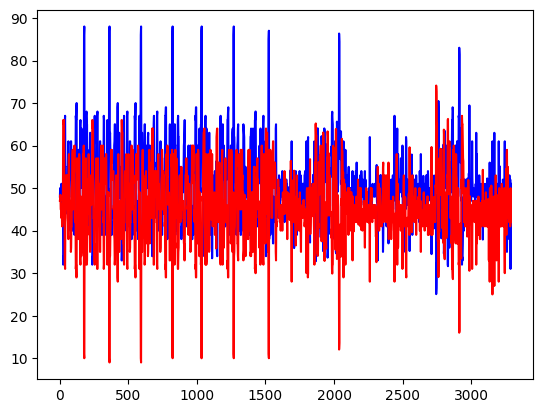

In [ ]:
import matplotlib.pyplot as plt

plt.plot(grouped.index, grouped['Biden'], color="blue")
plt.plot(grouped.index, grouped['Trump'], color="red")

In [ ]:
# Plotting the Difference
diff_by_date = grouped.groupby('start_date')['Biden', 'Trump'].mean().reset_index()
diff_by_date['difference'] = diff_by_date['Biden'] - diff_by_date['Trump']
diff_by_date

<ipython-input-25-3744295678c9>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  diff_by_date = grouped.groupby('start_date')['Biden', 'Trump'].mean().reset_index()


,start_date,Biden,Trump,difference
0,2020-08-01,41.000000,46.000000,-5.000000
1,2020-08-02,45.219375,47.030625,-1.811250
2,2020-08-03,47.600000,43.900000,3.700000
3,2020-08-04,49.428571,46.000000,3.428571
4,2020-08-05,47.200000,45.200000,2.000000
...,...,...,...,...
75,2020-10-15,51.770270,45.832432,5.937838
76,2020-10-16,51.921495,45.806542,6.114953
77,2020-10-17,52.047170,45.839623,6.207547
78,2020-10-18,52.025472,45.757547,6.267925


In [ ]:
import plotly.express as px

fig = px.line(diff_by_date, x="start_date", y="difference", title='Biden vs Trump Difference')
fig.show()

# Tidying up our data

In [ ]:
polls = grouped[['state', 'pollster','end_date','Biden','Trump','Seats']]
polls.head()

,state,pollster,end_date,Biden,Trump,Seats
1,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,48.0,47.0,18
3,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,50.0,47.0,20
5,Georgia,Emerson College,2020-10-19,47.0,48.4,16
7,Pennsylvania,Ipsos,2020-10-19,49.0,45.0,20
9,Pennsylvania,Ipsos,2020-10-19,49.0,45.0,20


# We Add Centers and Standard Deviations to our Averaged Polling Data

Looking at the polls for each state, if you imagine that the Trump voters are stacked on the top and the Biden votes are stacked up from the bottom, with the undecideds in-between, then an argument can be made for a **very simple model** that positions the actual vote distributed around the average between the two.

For simplicity sake, let's use a normal distribution.

For every state, we're going to create a normal distribution from 0 to 100. The distribution will be **centered** between the Biden vote and the Trump vote, and the **std dev** will be half the number of undecided votes plus 3.

![](https://i.imgur.com/Zl4iyoy.png)

In [ ]:
# Add the centers
def get_center(row):
    """"Example calculation, Biden is 48, Trump is 47
    48 + (100-47-48)/2 = 48 + 5/2 = 50.5
    """
    return row["Biden"] + (100 - row["Trump"] - row["Biden"]) / 2

polls["Center"] = polls.apply(get_center, axis=1)

# add the deviations
def get_deviation(row):
    # Sort of a guesstimate for STD
    return (abs(row['Trump'] - row["Center"]) / 2) + 3

polls["Stddev"] = polls.apply(get_deviation, axis=1)

polls

<ipython-input-28-3eaf72711537>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-28-3eaf72711537>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,state,pollster,end_date,Biden,Trump,Seats,Center,Stddev
1,Ohio,Rasmussen Reports/Pulse Opinion Research,2020-10-19,48.0,47.0,18,50.5,4.75
3,Pennsylvania,Rasmussen Reports/Pulse Opinion Research,2020-10-19,50.0,47.0,20,51.5,5.25
5,Georgia,Emerson College,2020-10-19,47.0,48.4,16,49.3,3.45
7,Pennsylvania,Ipsos,2020-10-19,49.0,45.0,20,52.0,6.50
9,Pennsylvania,Ipsos,2020-10-19,49.0,45.0,20,52.0,6.50
...,...,...,...,...,...,...,...,...
3281,North Carolina,Data for Progress,2020-08-02,46.0,44.0,15,51.0,6.50
3283,North Carolina,Data for Progress,2020-08-02,49.0,45.0,15,52.0,6.50
3285,Wisconsin,Morning Consult,2020-08-02,52.0,41.0,10,55.5,10.25
3287,Utah,RMG Research,2020-08-01,31.0,50.0,6,40.5,7.75


# Now we're going average all polls

This isn't the best method as it disregards any weighting to better polls and assumes all area equal. In a more advanced study we can use metrics like fte_grade, sample_size and methodology to weight polls.

In [ ]:
poll_state_summary = polls.groupby('state').mean().reset_index()
poll_state_summary

<ipython-input-29-ced6738cefb2>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,state,Biden,Trump,Seats,Center,Stddev
0,Alabama,39.597727,57.199545,9.0,41.199091,11.000227
1,Alaska,44.020000,52.478636,3.0,45.770682,6.558523
2,Arizona,49.163026,45.112368,11.0,52.025329,6.560559
3,Arkansas,38.753684,58.801579,6.0,39.976053,12.412763
4,California,62.081923,33.621154,55.0,64.230385,18.304615
5,Colorado,55.022903,40.454194,9.0,57.284355,11.415081
6,Connecticut,62.420000,34.561111,7.0,63.929444,17.684167
7,Delaware,63.388500,33.953500,3.0,64.717500,18.382000
8,District of Columbia,86.283889,11.117222,3.0,87.583333,41.233056
9,Florida,48.740263,46.046842,29.0,51.346711,5.706118


# Simulation Time!

We're going to generate a random number from the distribution.

If it's above 50, we'll say Biden won the state.

If it's below 50, we'll say Biden lost the state.

If Biden wins the state, he gets the number of electoral seats that state represents.

If he doesn't win he get's nothing.....just the way it is, live with it.

This will give us a nice little series with the numbers representing the electoral seats she won from each state.

The output table below shows for each state (in a each row), the number of seats Biden one. The column represents the results of one simulation.

In [ ]:
from numpy.random import normal

def run_election_simulation(times, polls):
    # Create a blank data frame to hold our results
    result_frame = pd.DataFrame()

    def get_seats(row):
        # using the Normal Distriution function, we input the mean (center) and STD
        # if the result is great than 50, that indicates a win for Biden
        result = normal(row["Center"], row["Stddev"])
        return row["Seats"] if result > 50 else 0

    for i in range(times):
        result_frame[i] = polls.apply(get_seats, axis=1)

    return result_frame

# given an example of the output
res = run_election_simulation(10, poll_state_summary)
res.loc['Total',:] = res.sum(axis=0)

# Adding State Name to Results DF
res = pd.concat([poll_state_summary['state'], res], axis=1, sort=False)

# A 0.0 means Biden didn't win that seat, or that Trump won that seat
res

,state,0,1,2,3,4,5,6,7,8,9
0,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alaska,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0
2,Arizona,11.0,0.0,11.0,11.0,0.0,11.0,11.0,11.0,11.0,0.0
3,Arkansas,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,California,0.0,0.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0
5,Colorado,9.0,9.0,9.0,0.0,9.0,9.0,9.0,0.0,0.0,9.0
6,Connecticut,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
7,Delaware,0.0,3.0,0.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0
8,District of Columbia,3.0,3.0,3.0,0.0,3.0,3.0,0.0,0.0,3.0,3.0
9,Florida,29.0,29.0,0.0,29.0,0.0,29.0,29.0,0.0,29.0,0.0


# Let's analyze the above simulated results on a per state level

In [ ]:
# Convert values to intergers
summary = pd.DataFrame((res == 0).astype(int).sum(axis=1))

# Add back states to leftmost column
res_summary = pd.concat([poll_state_summary['state'], summary], axis=1, sort=False)
res_summary.columns = ['state', 'trump_wins']

# Get a percentage of times Trump Won in the simulations
res_summary['percent_trump_wins'] = (res_summary['trump_wins'] / 10) * 100
res_summary

,state,trump_wins,percent_trump_wins
0,Alabama,10,100.0
1,Alaska,8,80.0
2,Arizona,3,30.0
3,Arkansas,9,90.0
4,California,2,20.0
5,Colorado,3,30.0
6,Connecticut,0,0.0
7,Delaware,3,30.0
8,District of Columbia,3,30.0
9,Florida,4,40.0


### Let's get the sum of Biden's wins across the simulations

In [ ]:
res.loc['Total'][res.loc['Total'] > 270.0].count()

9

## THIS WHERE THE SIMULATIONS HAPPEN (10K)

In [ ]:
number_of_simulations = 10000

election_results = run_election_simulation(number_of_simulations, poll_state_summary)
election_results.loc['Total',:] = election_results.sum(axis=0)

biden_wins = election_results.loc['Total'][election_results.loc['Total'] > 270.0].count()

# Print output
f"Joe Biden wins {biden_wins} times out of {number_of_simulations} simulations"

Streaming output truncated to the last 5000 lines.
<ipython-input-30-2ef1dc04823f>:14: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-30-2ef1dc04823f>:14: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-30-2ef1dc04823f>:14: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipy

'Joe Biden wins 7996 times out of 10000 simulations'

# Let's now summarize it per state

In [ ]:
summary = pd.DataFrame((election_results == 0).astype(int).sum(axis=1))
res_summary = pd.concat([poll_state_summary['state'], summary], axis=1, sort=False)
res_summary.columns = ['state', 'trump_wins']
res_summary['percent_trump_wins'] = (res_summary['trump_wins'] / number_of_simulations) * 100
res_summary['percent_biden_wins'] = 100 - res_summary['percent_trump_wins']
res_summary = res_summary.dropna()
res_summary#.sort_values(by="trump_wins")

,state,trump_wins,percent_trump_wins,percent_biden_wins
0,Alabama,7950,79.50,20.50
1,Alaska,7389,73.89,26.11
2,Arizona,3762,37.62,62.38
3,Arkansas,7904,79.04,20.96
4,California,2114,21.14,78.86
5,Colorado,2699,26.99,73.01
6,Connecticut,2153,21.53,78.47
7,Delaware,2065,20.65,79.35
8,District of Columbia,1835,18.35,81.65
9,Florida,4022,40.22,59.78


In [ ]:
res_summary.sort_values('percent_biden_wins', ascending=False).head(30)

,state,trump_wins,percent_trump_wins,percent_biden_wins
8,District of Columbia,1835,18.35,81.65
21,Massachusetts,1999,19.99,80.01
39,Rhode Island,2029,20.29,79.71
45,Vermont,2059,20.59,79.41
32,New York,2060,20.60,79.40
7,Delaware,2065,20.65,79.35
20,Maryland,2084,20.84,79.16
11,Hawaii,2094,20.94,79.06
4,California,2114,21.14,78.86
6,Connecticut,2153,21.53,78.47


In [1]:
def getSeats(row):
    return states[row["state"]]

res_summary["seats"] = res_summary.apply(getSeats, axis=1)

res_summary['seats_trump_wins'] = res_summary['percent_trump_wins'].apply(lambda x: 1 if x > 50 else 0)
res_summary['seats_trump_wins'] = res_summary['seats_trump_wins'] * res_summary['seats']

res_summary['seats_biden_wins'] = res_summary['percent_biden_wins'].apply(lambda x: 1 if x > 50 else 0)
res_summary['seats_biden_wins'] = res_summary['seats_biden_wins'] * res_summary['seats']
seats_trump_wins = res_summary['seats_trump_wins'].sum()
seats_biden_wins = res_summary['seats_biden_wins'].sum()
print(seats_biden_wins)
print(seats_trump_wins)
res_summary

NameError: name 'res_summary' is not defined

# Creating a US Election Map

In [ ]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

res_summary = res_summary.replace({"state": us_state_abbrev})
res_summary.head()

,state,trump_wins,percent_trump_wins,percent_biden_wins,seats,seats_trump_wins,seats_biden_wins
0,AL,7950,79.50,20.50,9,9,0
1,AK,7389,73.89,26.11,3,3,0
2,AZ,3762,37.62,62.38,11,0,11
3,AR,7904,79.04,20.96,6,6,0
4,CA,2114,21.14,78.86,55,0,55


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations = res_summary['state'], # Spatial coordinates
    z = res_summary['percent_trump_wins'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Bluered',
    colorbar_title = "Trump",
))

title = f'{number_of_simulations} Simulations of the 2020 US Election show Biden winning {seats_biden_wins} and Trump winning {seats_trump_wins} Seats'
fig.update_layout(
    title_text = title, #'2020 Simulation of The US Presidential Election',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [ ]:
def election_simulation(times, polls):
  result_frame = pd.DataFrame
  def get_seats(row):
    result=normal(row['Center'],row['Stddev'])
    return row[seats] if result >  else
  for i in range(times):
    result_frame[i] = polls.apply(get_seats,axis=)
  return result_frame

res = election_simulation(10,poll_state_summary)
res.loc['total',:] = res.sum(axis = 0)
res = pd.concat([poll_state_summary['state'],res] axis =1 sort = False)

summary = pd.DataFrame((res==0),astype(int),sum(axis=1))
res_summary =

In [12]:
np.random.normal(2,3)

2.8906774894397307